<a href="https://colab.research.google.com/github/aishaabduallah/Ex4/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 58.6MB/s]


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [84]:
data=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
data.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [86]:
data.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [87]:
data.duplicated().sum()

0

In [88]:
data.shape

(147972, 21)

In [89]:
data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [90]:
count=data['Breakdown_or_Running_Late'].value_counts()
print(count)

Breakdown_or_Running_Late
Running Late    130857
Breakdown        17115
Name: count, dtype: int64


In [91]:
empty_rows=data[data.isnull().any(axis=1)]
print(empty_rows)

       School_Year  Busbreakdown_ID             Run_Type Bus_No Route_Number  \
0        2015-2016          1224901             Pre-K/EI    811            1   
1        2015-2016          1225098             Pre-K/EI   9302            1   
2        2015-2016          1215800             Pre-K/EI    358            2   
3        2015-2016          1215511             Pre-K/EI    331            2   
4        2015-2016          1215828             Pre-K/EI    332            2   
...            ...              ...                  ...    ...          ...   
147966   2016-2017          1337850             Pre-K/EI    118            3   
147967   2016-2017          1338452             Pre-K/EI   9345            2   
147968   2016-2017          1341521             Pre-K/EI   0001            5   
147970   2016-2017          1353045    Special Ed PM Run  5525D         Q920   
147971   2016-2017          1353046  Project Read PM Run   2530         K617   

               Reason Schools_Serviced 

In [93]:
data['Breakdown_or_Running_Late'] = pd.to_numeric(data['Breakdown_or_Running_Late'], errors='coerce')


In [78]:
data.dropna(subset=['School_Year', 'Busbreakdown_ID'], axis=0, inplace=True)

In [13]:
is_missing = data.isnull().sum()
print(is_missing)

School_Year                            0
Busbreakdown_ID                        0
Run_Type                              18
Bus_No                                 0
Route_Number                          29
Reason                                34
Schools_Serviced                       1
Occurred_On                            1
Created_On                             1
Boro                                1519
Bus_Company_Name                       1
How_Long_Delayed                    6263
Number_Of_Students_On_The_Bus          1
Has_Contractor_Notified_Schools        1
Has_Contractor_Notified_Parents        1
Have_You_Alerted_OPT                   1
Informed_On                            1
Incident_Number                    39454
Last_Updated_On                        1
Breakdown_or_Running_Late              1
School_Age_or_PreK                     1
School_Year_Start                      0
dtype: int64


In [8]:
categorical_features = data.select_dtypes(include=['object']).columns
print(data[categorical_features].nunique())

School_Year                            3
Run_Type                              10
Bus_No                              7416
Route_Number                        7325
Reason                                10
Schools_Serviced                    3076
Occurred_On                        19340
Created_On                         21265
Boro                                  11
Bus_Company_Name                      83
How_Long_Delayed                     993
Has_Contractor_Notified_Schools        2
Has_Contractor_Notified_Parents        2
Have_You_Alerted_OPT                   2
Informed_On                        21265
Incident_Number                     1106
Last_Updated_On                    40063
Breakdown_or_Running_Late              2
School_Age_or_PreK                     2
dtype: int64


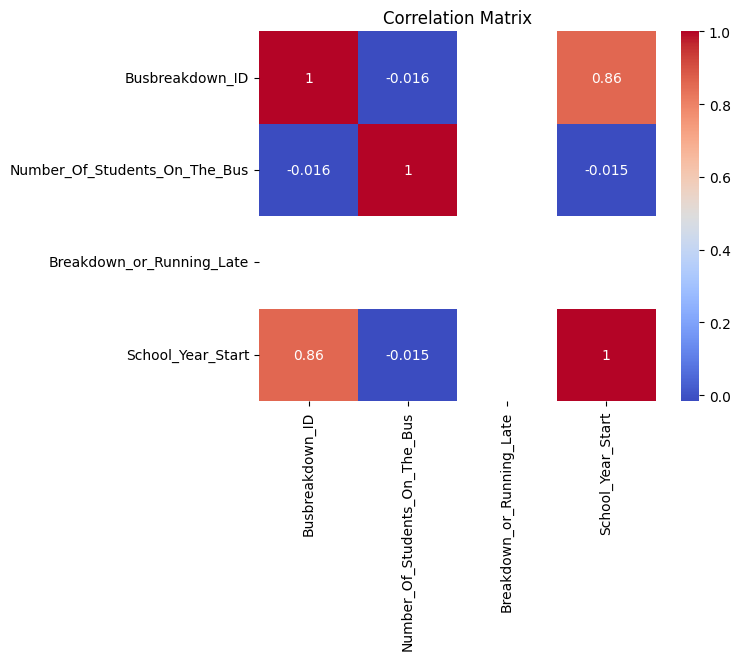

In [97]:
data['School_Year_Start'] = data['School_Year'].str.split('-').str[0].astype(int)

correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

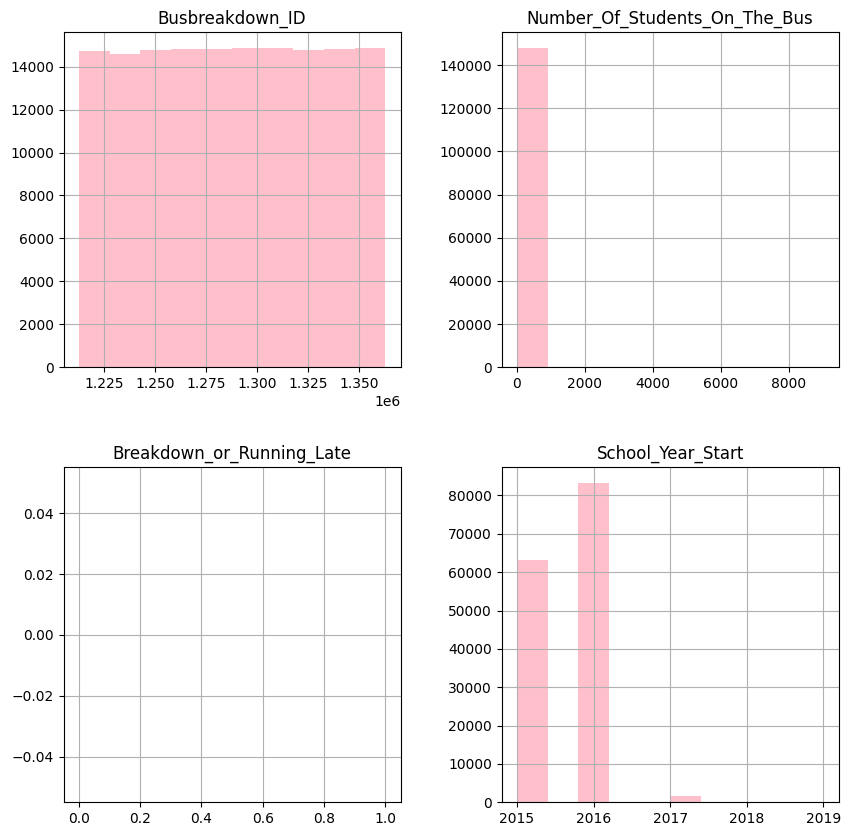

In [98]:
data.hist(figsize=(10, 10), color='pink');

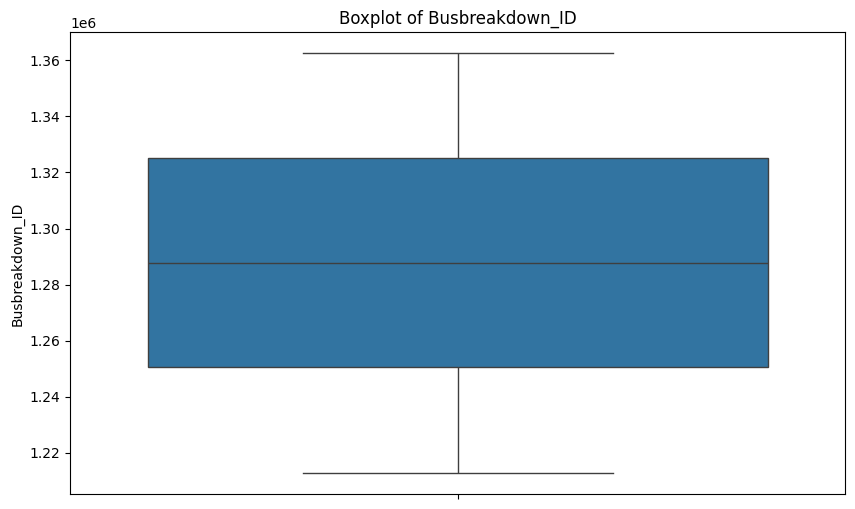

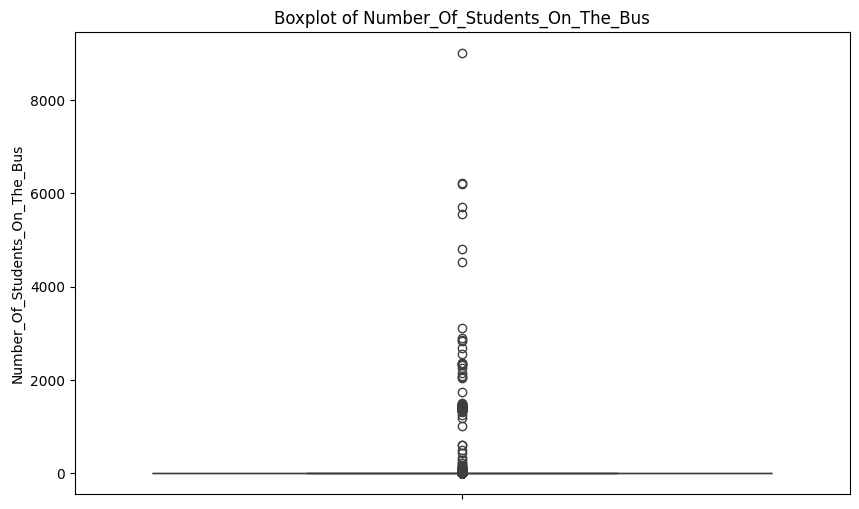

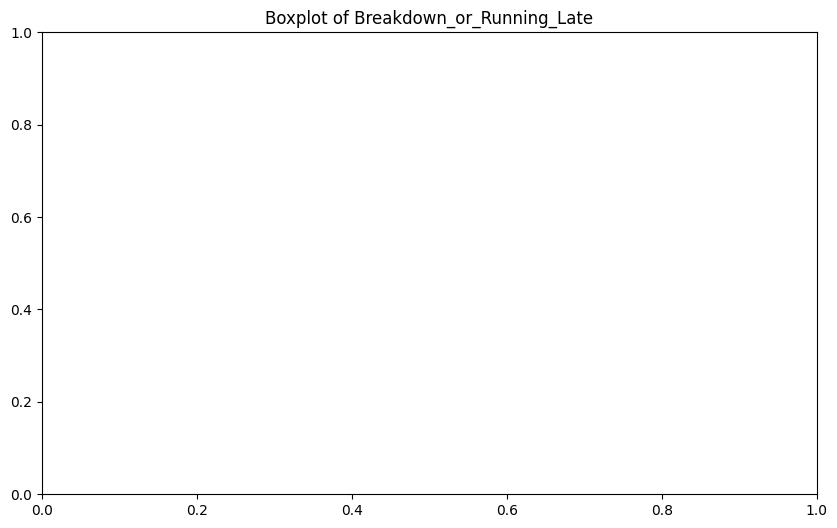

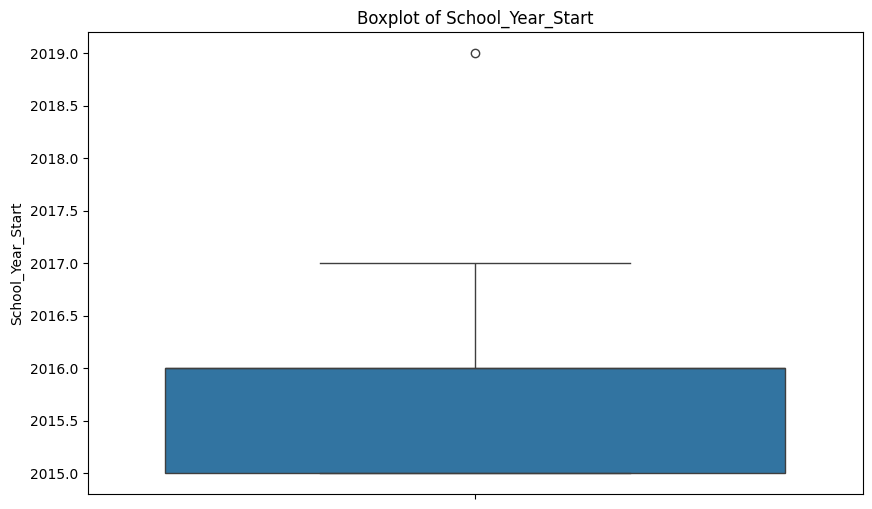

In [100]:
# Detect outliers using box plots
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    # Drop missing values before plotting
    sns.boxplot(data=data[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()

In [32]:
categorical_features = data.select_dtypes(include=['object']).columns # Use 'data' instead of 'df'
for feature in categorical_features:
    print(f"{feature}:")
    print(data[feature].value_counts()) # Use 'data' instead of 'df'
    print("\n")

School_Year:
School_Year
2015-2016    40590
2016-2017       66
2017-2018        4
Name: count, dtype: int64


Run_Type:
Run_Type
Special Ed AM Run          25080
Pre-K/EI                    5330
General Ed AM Run           5021
Special Ed PM Run           3650
General Ed PM Run           1197
Special Ed Field Trip        137
General Ed Field Trip        126
Project Read PM Run           89
Project Read AM Run           11
Project Read Field Trip        1
Name: count, dtype: int64


Bus_No:
Bus_No
9352      152
213       137
357       136
0009      112
110       106
         ... 
1473        1
8023        1
30134       1
TN0380      1
22816       1
Name: count, Length: 7416, dtype: int64


Route_Number:
Route_Number
1        738
2        602
3        587
4        379
5        352
        ... 
K389       1
Q9579      1
Q2816      1
VC4        1
X292       1
Name: count, Length: 7325, dtype: int64


Reason:
Reason
Heavy Traffic                  22760
Other                           7163
M

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [36]:
categorical_features = ['Run_Type', 'Reason', 'Schools_Serviced', 'Boro',
                        'Bus_Company_Name', 'Has_Contractor_Notified_Schools',
                        'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT']

numerical_features = ['How_Long_Delayed', 'Number_Of_Students_On_The_Bus']

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        , categorical_features)

      ])


In [38]:
data['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late'].map({'Breakdown': 1, 'Running Late': 0})
y = data['Breakdown_or_Running_Late']
X = data.drop(columns=['Breakdown_or_Running_Late'])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # Import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float', 'int']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformations selectively
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [123]:
from keras.models import Sequential
from keras.layers import Dense

input_dim = X_train_processed.shape[1]
#Building the ANN Model
model = Sequential()
model.add(Dense(28, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
#Training the Model
model.fit(X_train_processed, y_train, epochs=20, batch_size=32, validation_split=0.2)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 28)                  │       8,506,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              29 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,506,989 (32.45 MB)

 Trainable params: 8,506,989 (32.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 266s 107ms/step - accuracy: 0.1164 - loss: 0.1212 - val_accuracy: 0.1155 - val_loss: 0.0264
Epoch 2/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 335s 112ms/step - accuracy: 0.1155 - loss: 0.0086 - val_accuracy: 0.1155 - val_loss: 0.0288
Epoch 3/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 273s 110ms/step - accuracy: 0.1178 - loss: 0.0019 - val_accuracy: 0.1155 - val_loss: 0.0361
Epoch 4/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 319s 109ms/step - accuracy: 0.1162 - loss: 5.7335e-04 - val_accuracy: 0.1155 - val_loss: 0.0388
Epoch 5/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 321s 109ms/step - accuracy: 0.1161 - loss: 2.4803e-04 - val_accuracy: 0.1155 - val_loss: 0.0420
Epoch 6/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 271s 109ms/step - accuracy: 0.1172 - loss: 4.6997e-05 - val_accuracy: 0.1155 - val_loss: 0.0492
Epoch 7/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 271s 109ms/step - accuracy: 0.1159 - loss: 1.7500e-04 - val_accuracy: 0.1155 - val_loss: 0.0493
Epoch 8/20
2479/2479 ━━━━━━━━━━━━━━━━━━━━ 323s

## Training the Model
Train the ANN model using the training data.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [124]:
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1526/1526 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1147 - loss: 0.0668
Test Loss: 0.06765396893024445
Test Accuracy: 0.11421023309230804


## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: